# Uber Supply-Demand Gap Analysis

## Introduction
This data set is a masked data set which is similar to what data analysts at Uber handle. Solving this project will give you an idea about how problems are systematically solved using EDA and data visualisation. <br>
<br>
## Business Understanding
You may have some experience of travelling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?<br>
<br>
Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue. Let’s hear more about such problems that Uber faces during its operations.<br>
<br>
As an analyst, you decide to address the problem Uber is facing - driver cancellation and non-availability of cars leading to loss of potential revenue. <br>
<br>
## Business Objectives
The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.  

In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
# Pandas is probably the most popular and important modules for any work related to data management. 
import pandas as pd

# numpy is a great library for doing mathmetical operations. 
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
## Some other snippit of codes to get the setting right 
## This is so that the chart created by matplotlib can be shown in the jupyter notebook. 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [2]:
#creating a function for count of missing values and % of missing values for d1 dataframe
def missing_data(d1):
    missing_data1 = pd.DataFrame(round(d1.isnull().sum().sort_values(ascending=False)/len(d1.index)*100,2), columns=['% of missing value'])
    missing_data1['Count of Missing Values'] = d1.isnull().sum()
    return missing_data1

In [3]:
#loading the dataset
df = pd.read_csv('Uber Request Data.csv')

In [4]:
#checking the head of data
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
#checking the no of rows and columns
df.shape

(6745, 6)

In [6]:
#checking the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [7]:
#renaming the column names
df = df.rename(columns={'Request id':'Request_id','Pickup point':'Pickup_point','Driver id':'Driver_id',
                       'Request timestamp':'Request_timestamp','Drop timestamp':'Drop_timestamp'})

In [8]:
#checking the dataframe again
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [9]:
#checking the missing values in the dataframe
missing_data(df)

,% of missing value,Count of Missing Values
Drop_timestamp,58.03,3914
Driver_id,39.29,2650
Request_timestamp,0.00,0
Status,0.00,0
Pickup_point,0.00,0
Request_id,0.00,0


In [10]:
#getting the no of unique values in Pickup point and status column
cols = ['Pickup_point','Status']
for col in cols:
    print(df[col].value_counts())
    print('*'*40)

City       3507
Airport    3238
Name: Pickup_point, dtype: int64
****************************************
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64
****************************************


In [11]:
#getting total of no of trips which are either cancelled or no cars available
total = len(df[(df['Status']=='Cancelled') | (df['Status']=='No Cars Available')])
print(total)

3914


Since total no of missing values in Drop_timestamp column and total num of trips which are either cancelled or no cars are available are equal , that means Drop timestamp does not have any missing value where trips are complete. 

# Cleaning the Data

In [12]:
#replacing the driver id where no cars available to zero
df['Driver_id'].fillna(0,inplace=True)

In [13]:
#changing the datatype of the driver id column and changing the Pickup timestamp and drop time stamp to datetime datatype
df['Driver_id'] = df['Driver_id'].astype(int)
df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'])
df['Drop_timestamp'] = pd.to_datetime(df['Drop_timestamp'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            6745 non-null int32
Status               6745 non-null object
Request_timestamp    6745 non-null datetime64[ns]
Drop_timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


In [15]:
#deleting the request id column as it is irrelevant and will not contrubite to our analysis
del df['Request_id']

In [16]:
#checking the head of data frame
df.head()

,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,Airport,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,Airport,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,City,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,Airport,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


We will keep the missing values in Drop_timestamp unchanged, because they are practically correct.

# Creating Derived Metrices

In [17]:
# creating derived metrices
df['Day'] = df['Request_timestamp'].dt.dayofweek #day of week 0=Monday, 6=Sunday
df['Hour_of_day'] = df['Request_timestamp'].dt.hour #hour of the day

In [18]:
# creating derived metrices for drop point
def drop_point(x):
    if x =='Airport':
        return 'City'
    elif x=='City':
        return 'Airport'
df['Drop_point'] = df['Pickup_point'].apply(lambda x : drop_point(x))

In [19]:
#changing the values of Day column to Monday, Tuesday and so on
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df = df.replace({'Day':days})

In [20]:
#creating a derived metric categorizing day in , morning, evening , night etc
def day_cat(x):
    if x >= 0 and x <=3:
        return 'Late Night'
    elif x >= 4 and x <=7:
        return 'Early Morning'
    elif x >= 8 and x <=11:
        return 'Morning'
    elif x >= 12 and x <=13:
        return 'Noon'
    elif x >= 14 and x <=15:
        return 'Afternoon'
    elif x >= 16 and x <=19:
        return 'Evening'
    elif x >= 20 and x <=23:
        return 'Night'
df['Time_slot'] = df['Hour_of_day'].apply(lambda x : day_cat(x))

# Analysis

In [21]:
#getting the frequency of trip request during timeslots
df['Time_slot'].value_counts()

Evening          1560
Early Morning    1452
Night            1439
Morning          1268
Late Night        375
Noon              344
Afternoon         307
Name: Time_slot, dtype: int64

In [22]:
#sample data
df.sample(10)

,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Day,Hour_of_day,Drop_point,Time_slot
5759,City,0,No Cars Available,2016-07-14 10:06:29,NaT,Thursday,10,Airport,Morning
5934,Airport,0,No Cars Available,2016-07-14 19:02:20,NaT,Thursday,19,City,Evening
3806,City,231,Cancelled,2016-12-07 20:11:00,NaT,Wednesday,20,Airport,Night
3315,Airport,119,Cancelled,2016-11-07 05:44:00,NaT,Monday,5,City,Early Morning
1140,Airport,118,Trip Completed,2016-07-14 19:52:09,2016-07-14 20:49:12,Thursday,19,City,Evening
1595,City,170,Trip Completed,2016-07-13 05:19:47,2016-07-13 06:24:44,Wednesday,5,Airport,Early Morning
4761,City,0,No Cars Available,2016-12-07 14:18:00,NaT,Wednesday,14,Airport,Afternoon
5850,Airport,0,No Cars Available,2016-07-14 17:38:56,NaT,Thursday,17,City,Evening
5288,City,0,No Cars Available,2016-07-13 16:35:25,NaT,Wednesday,16,Airport,Evening
888,Airport,91,Trip Completed,2016-11-07 21:04:00,2016-11-07 22:06:00,Monday,21,City,Night


# Univariate Analysis

### Let first analyse the frequency of the cab request during hours of the day

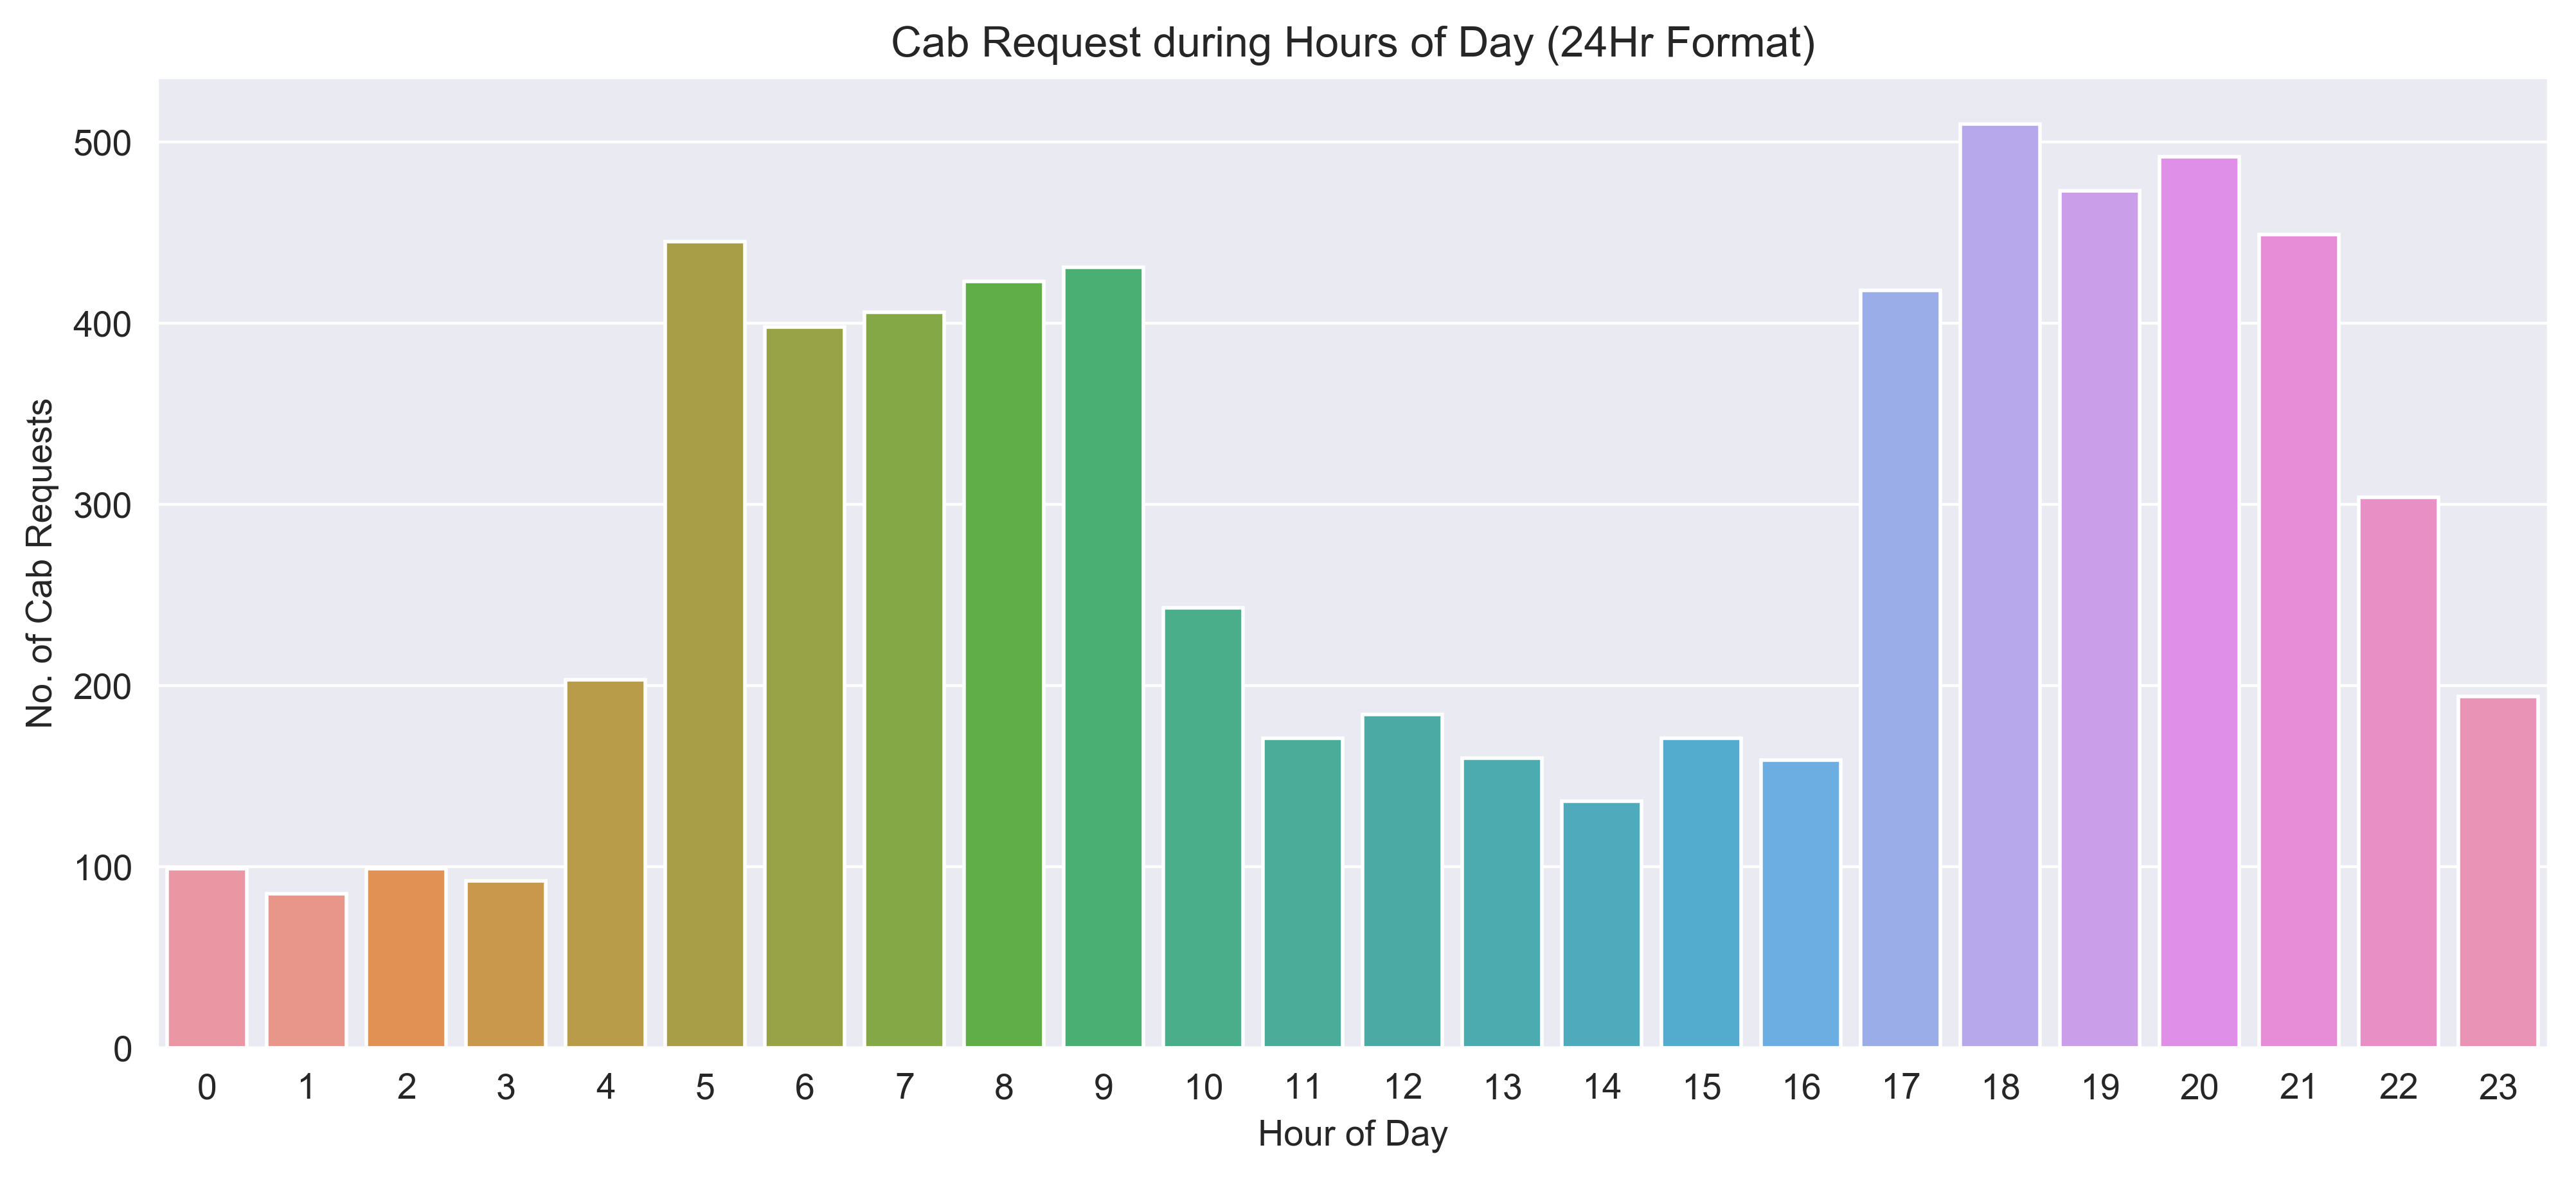

In [23]:
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(x=df['Hour_of_day'])
plt.ylabel('No. of Cab Requests')
plt.xlabel('Hour of Day')
plt.title('Cab Request during Hours of Day (24Hr Format)')
plt.show()

Points to be noted from the above graph:
1. Cab request is high between 5-9 AM and 5-9 PM i.e morning and evening time

### Visualizing frequency of Cab Request during various time slots

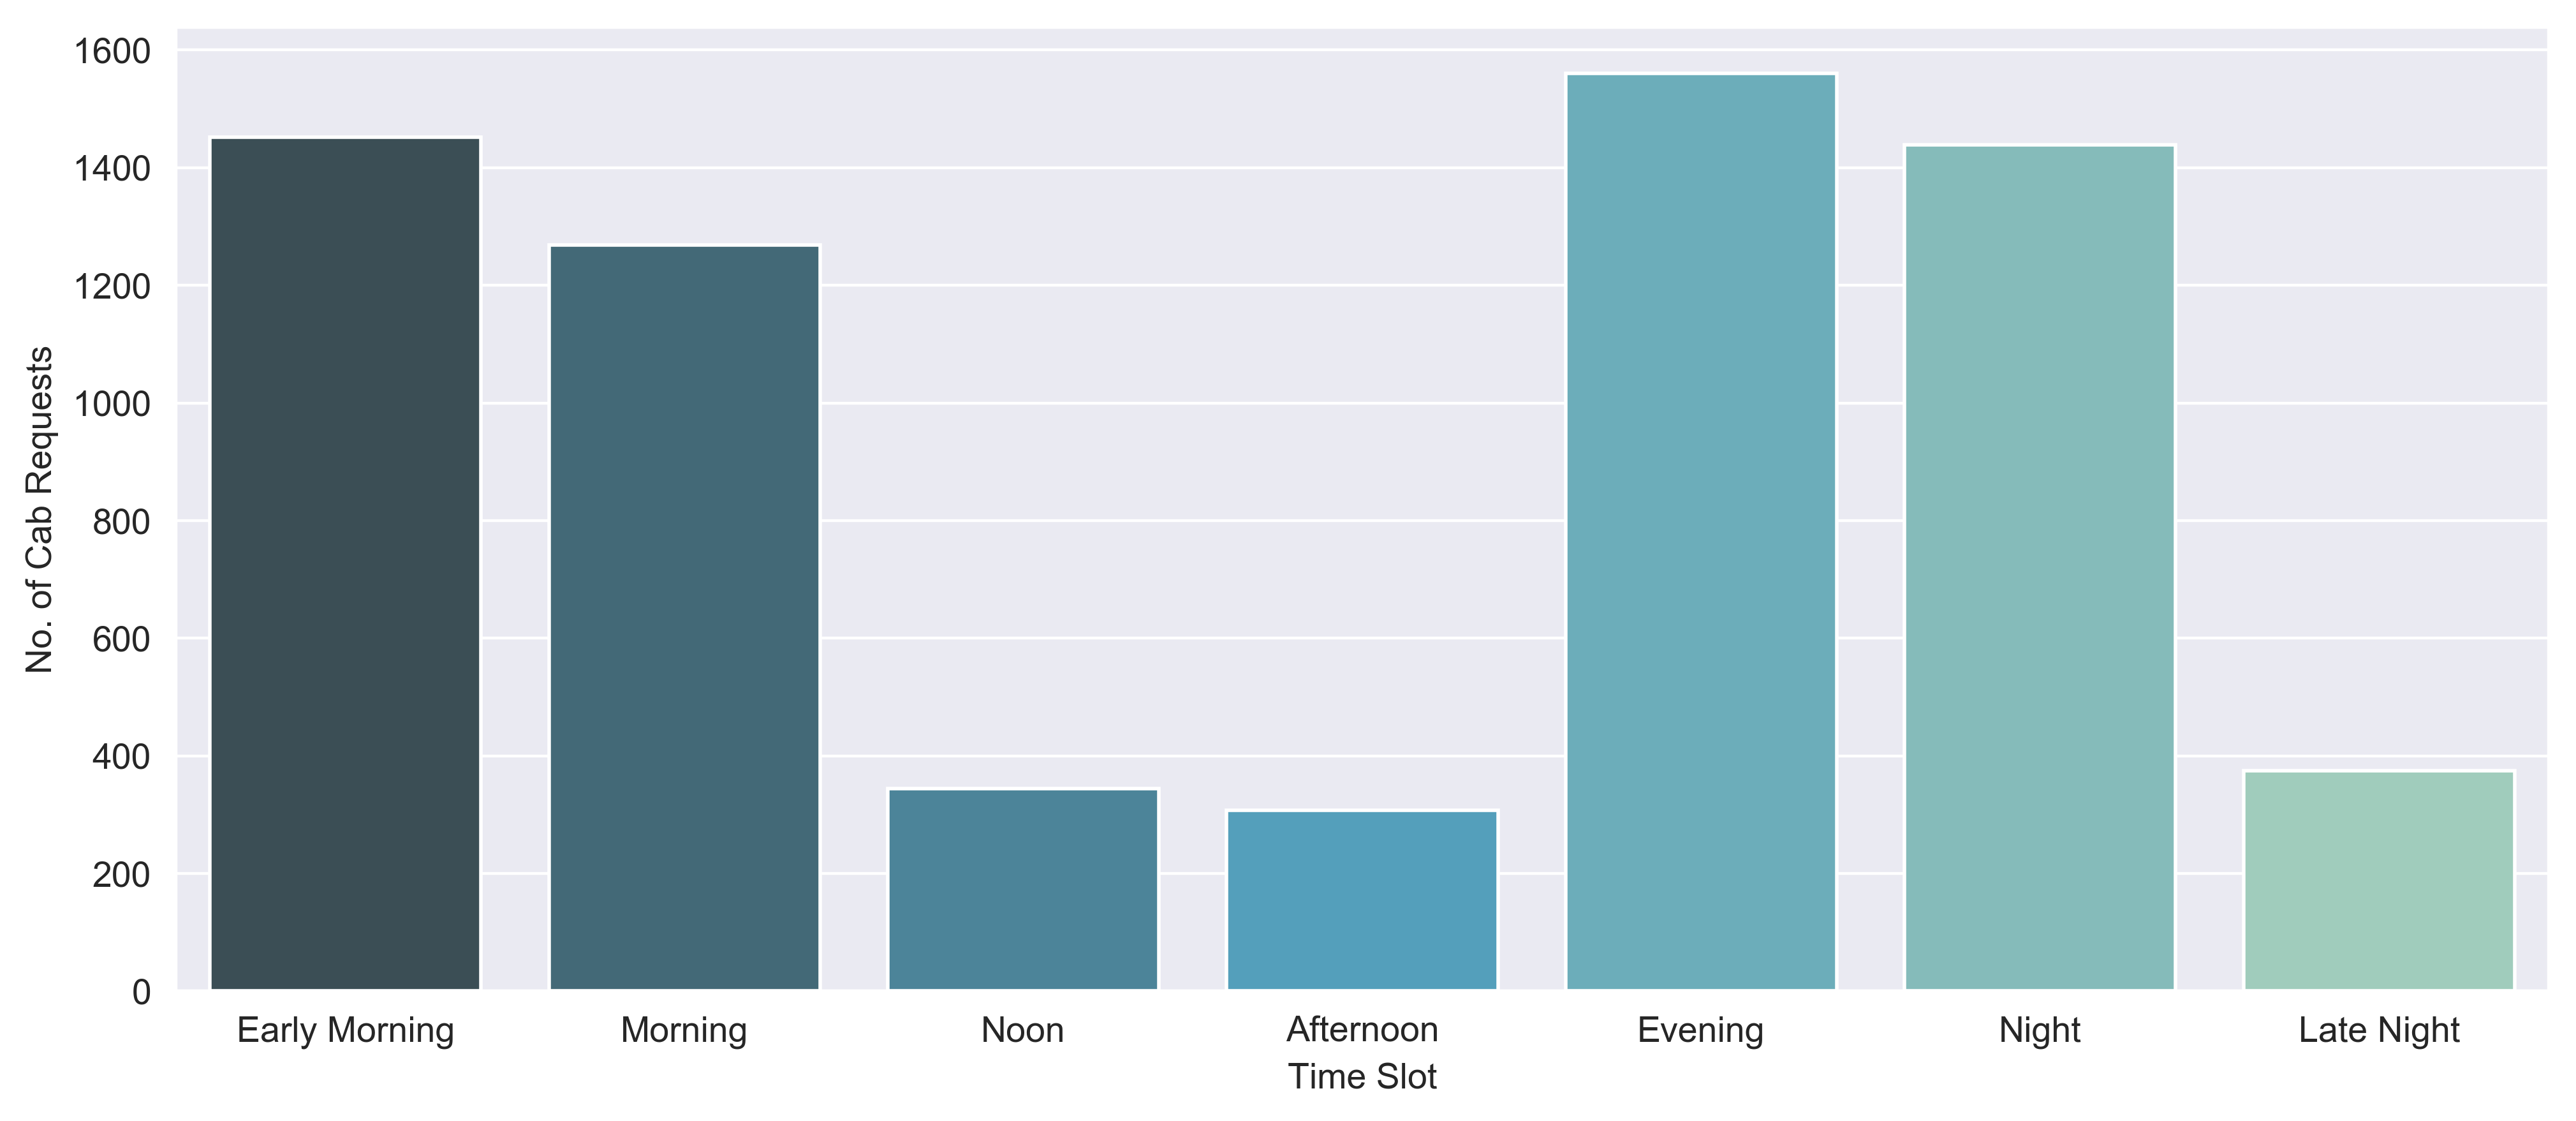

In [24]:
order = ['Early Morning','Morning','Noon','Afternoon','Evening','Night','Late Night']
plt.figure(figsize=(12,5), dpi = 200)
sns.countplot(x=df['Time_slot'].sort_values(), order = order,palette="GnBu_d" )
plt.xlabel('Time Slot')
plt.ylabel('No. of Cab Requests')
plt.show()

As we can see from the above two charts , the cab request during morning time , evening and night is high

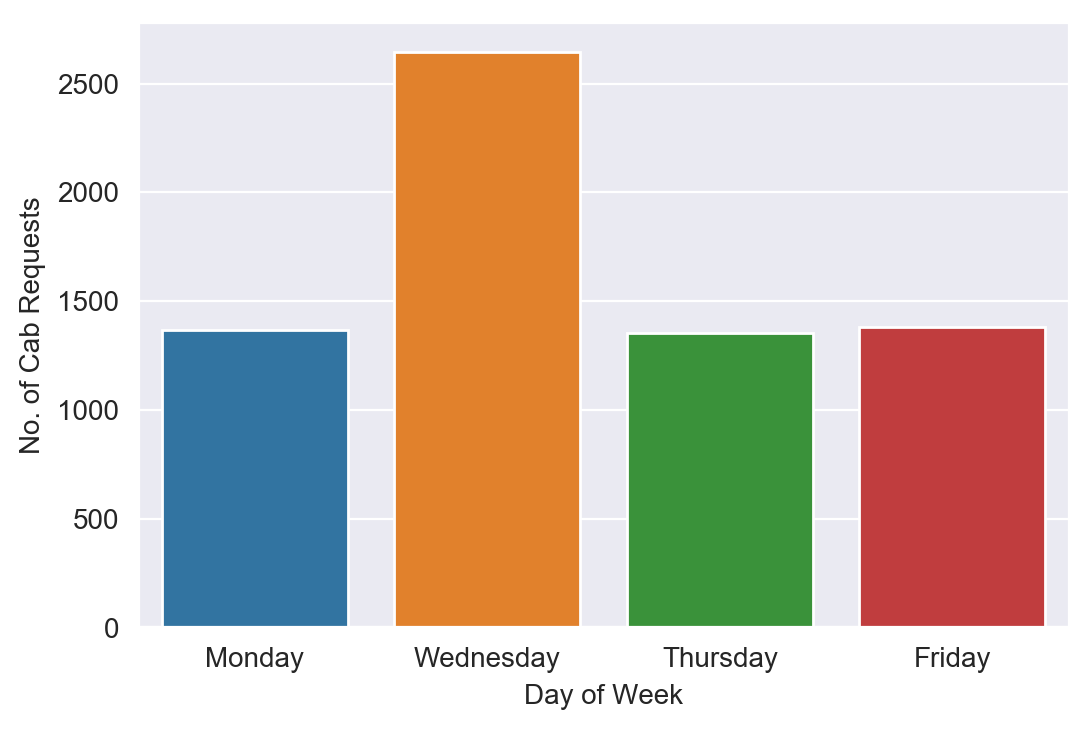

In [25]:
#vaiualising the demand over weekdays
plt.figure(dpi=100)
sns.countplot(x=df['Day'])
plt.xlabel('Day of Week')
plt.ylabel('No. of Cab Requests')
plt.show()

Here is the intresting pattern, there is a huge demand of cab on wednesday

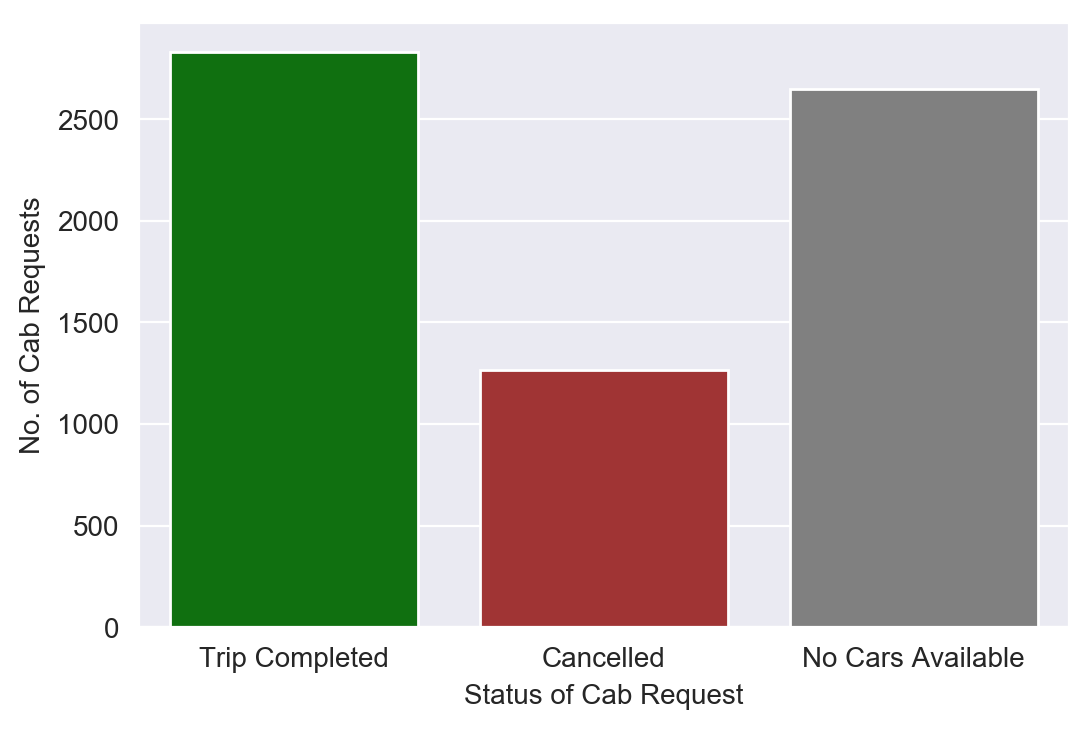

In [26]:
#visualising the status column
plt.figure(dpi=100)
pal = {'Trip Completed':"green", 'Cancelled':"firebrick",'No Cars Available':'gray'}
sns.countplot(x=df['Status'], palette=pal)
plt.ylabel('No. of Cab Requests')
plt.xlabel('Status of Cab Request')
plt.show()

As we can see that cars are not availabe in large numbers, if cabs were available then there must be good revenue generated by the company.

# Bivariate Analysis

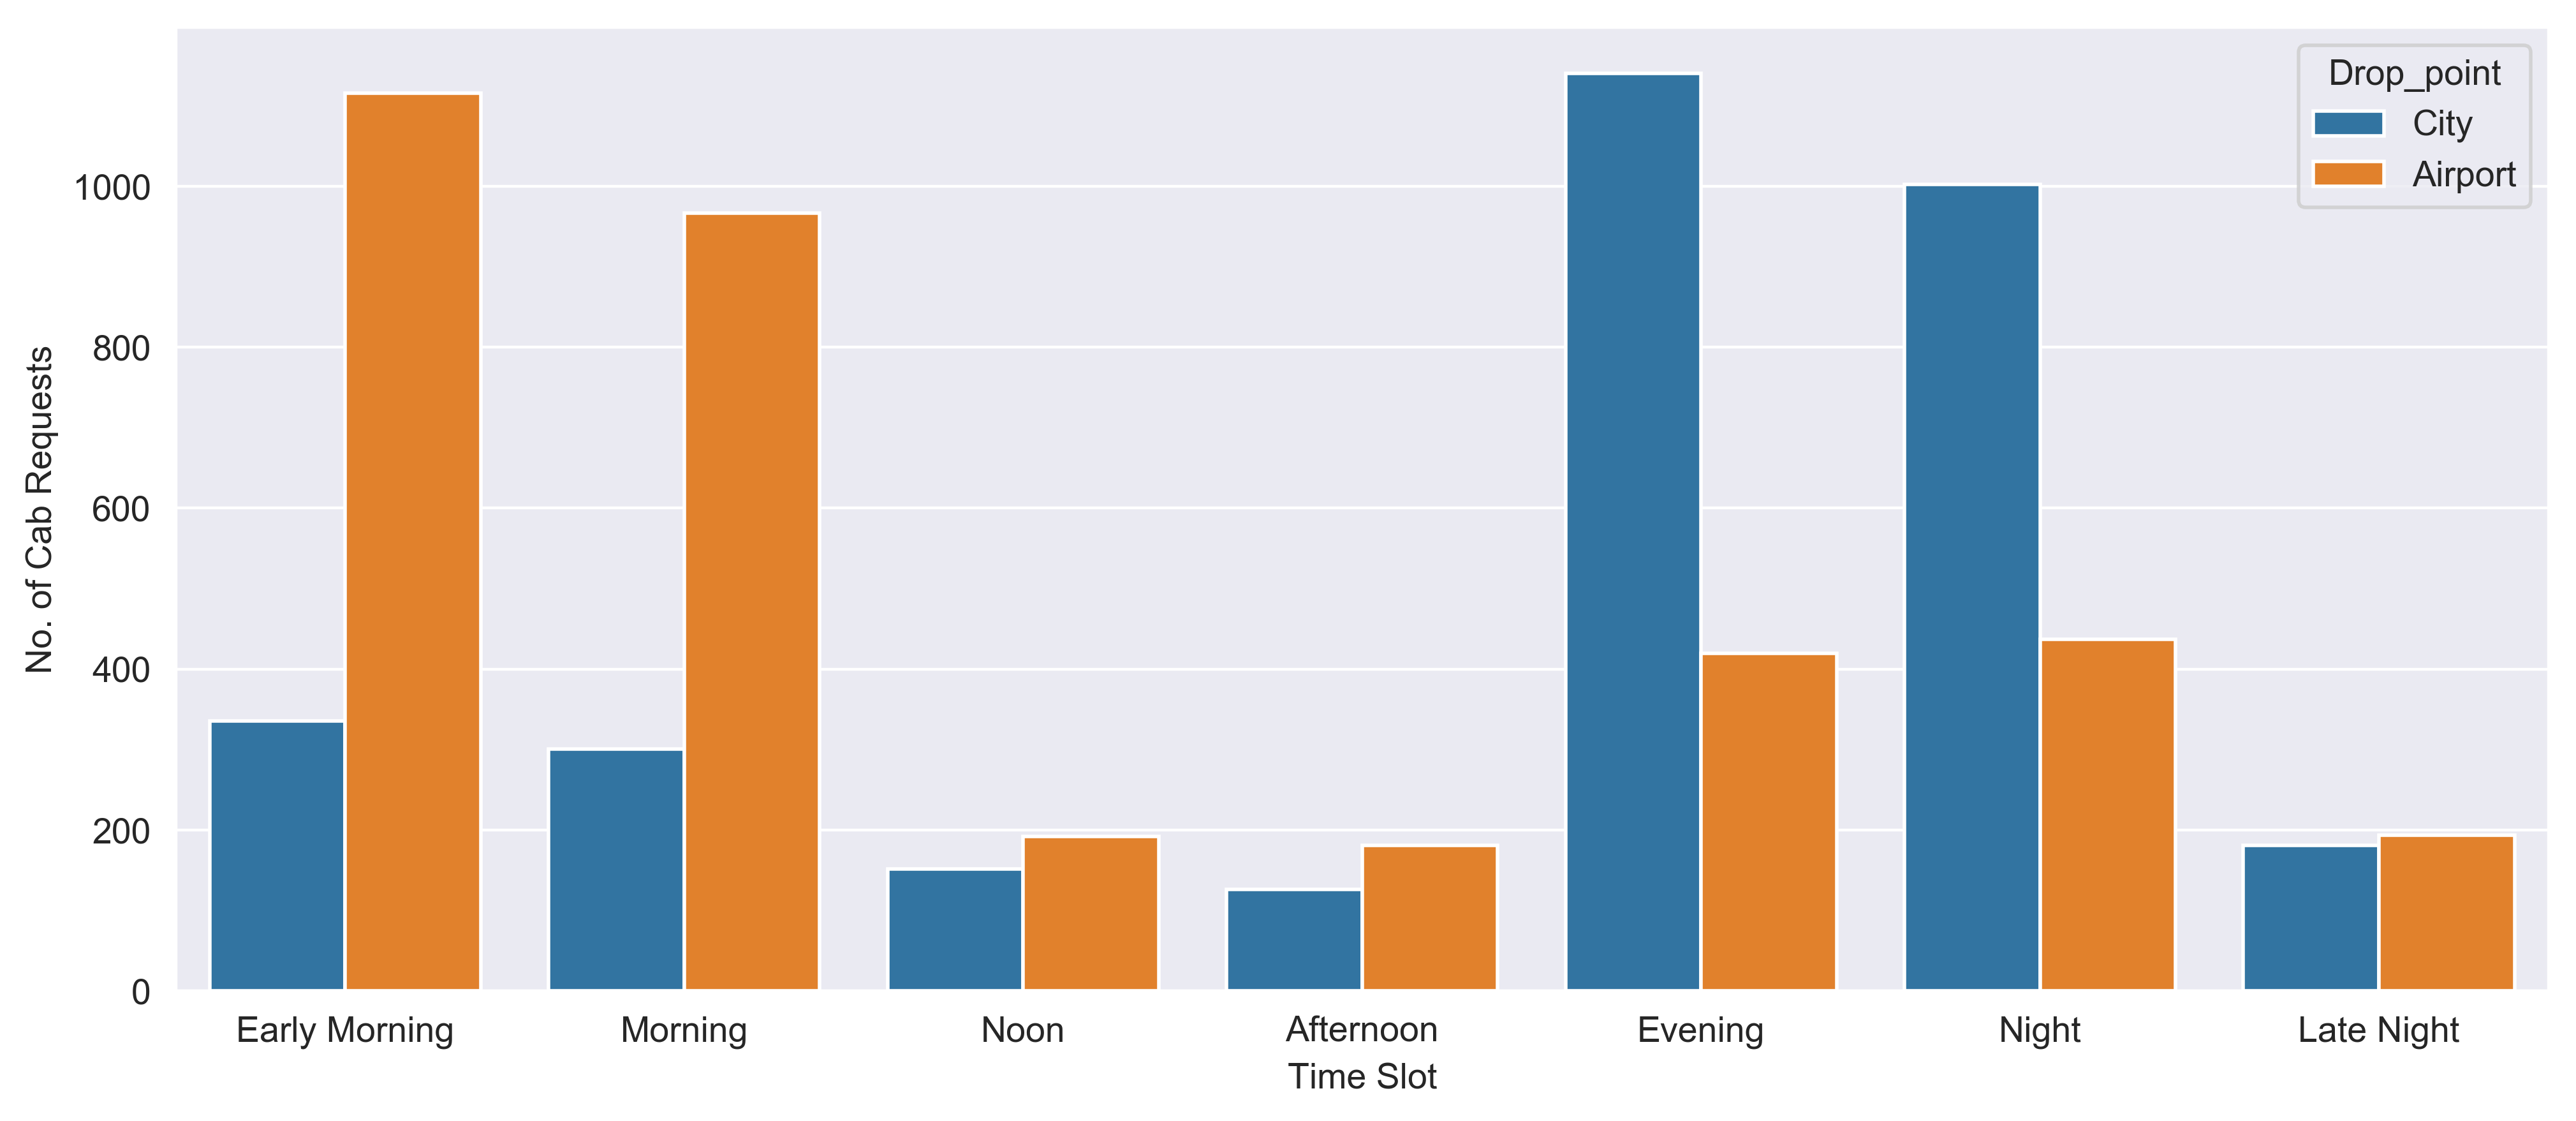

In [27]:
#lets see pattern of the travellers of cab request according to drop point
order = ['Early Morning','Morning','Noon','Afternoon','Evening','Night','Late Night']
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(x=df['Time_slot'].sort_values(),hue=df['Drop_point'], order = order)
plt.ylabel('No. of Cab Requests')
plt.xlabel('Time Slot')
plt.show()

Points to be noted from the above Graph:
1. During Early morning and Morning time, people travel from City to Airport
2. During Evening and night, People travel from Airport to city
3. Cab requests during noon and late-night is very low

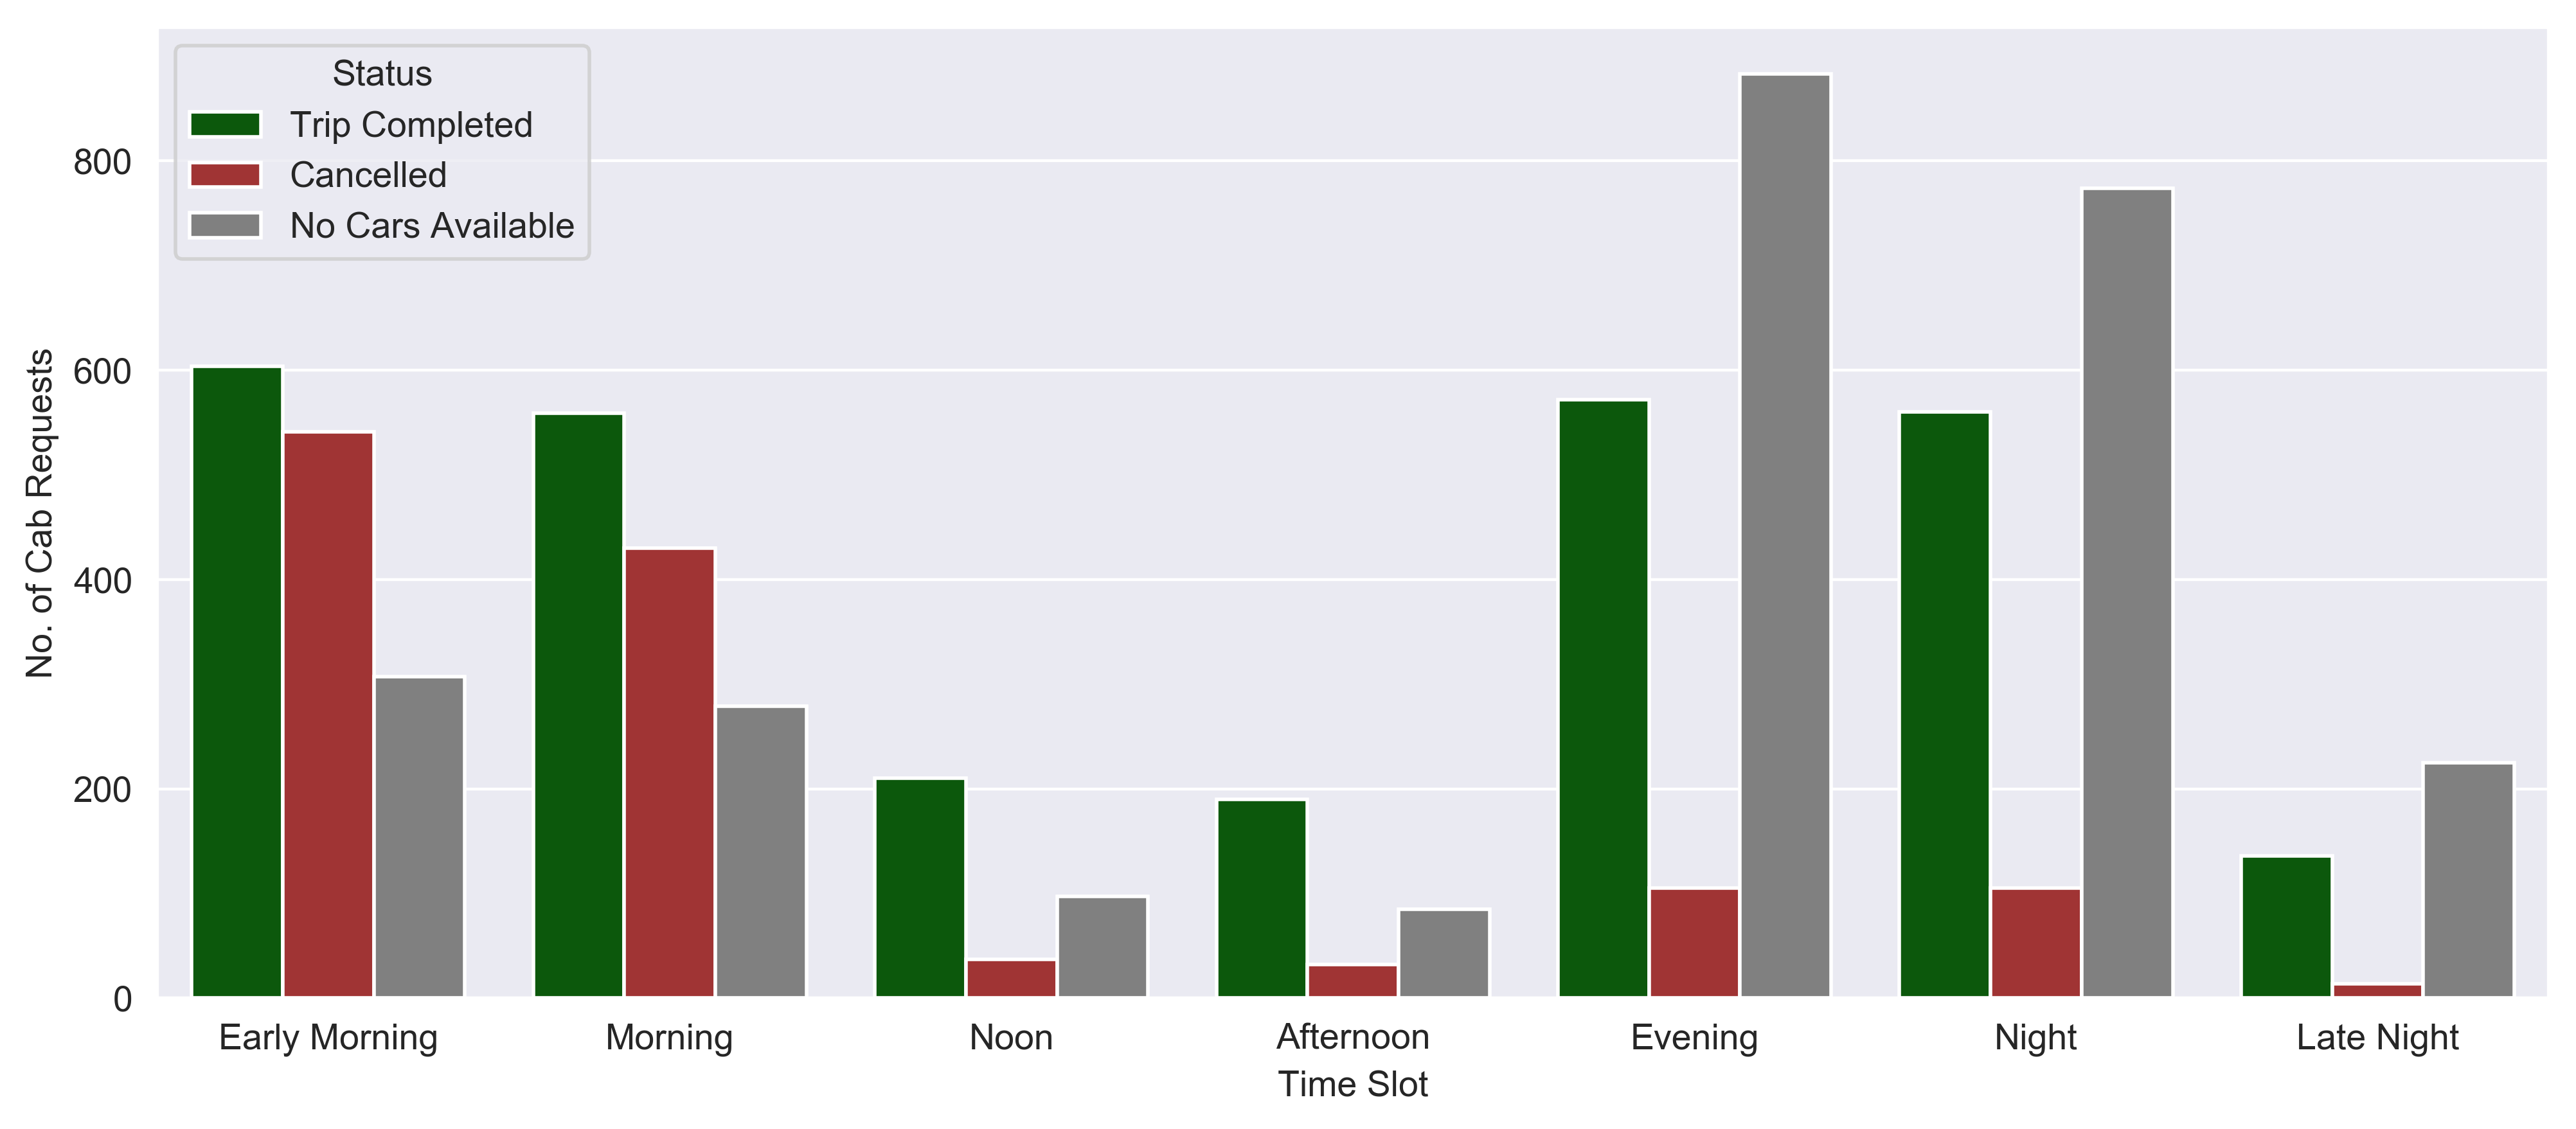

In [28]:
#Let see the status of trips over day
order = ['Early Morning','Morning','Noon','Afternoon','Evening','Night','Late Night']
pal = {'Trip Completed':"darkgreen", 'Cancelled':"firebrick",'No Cars Available':'gray'}
plt.figure(figsize=(12,5), dpi=200)
sns.countplot(x=df['Time_slot'].sort_values(),hue=df['Status'], order = order, palette=pal)
plt.ylabel('No. of Cab Requests')
plt.xlabel('Time Slot')
plt.show()

Points to be noted from the above graph:
   1. Most of the Trips got cancelled during Early morning and Morning when people want to travel to airport, due to this behaviour by driver company is loosing lot of revenue.
    2. Cars availability is very low during evening and night time
    3. Demand and supply gap during evening and night time due to non avaliability of cabs

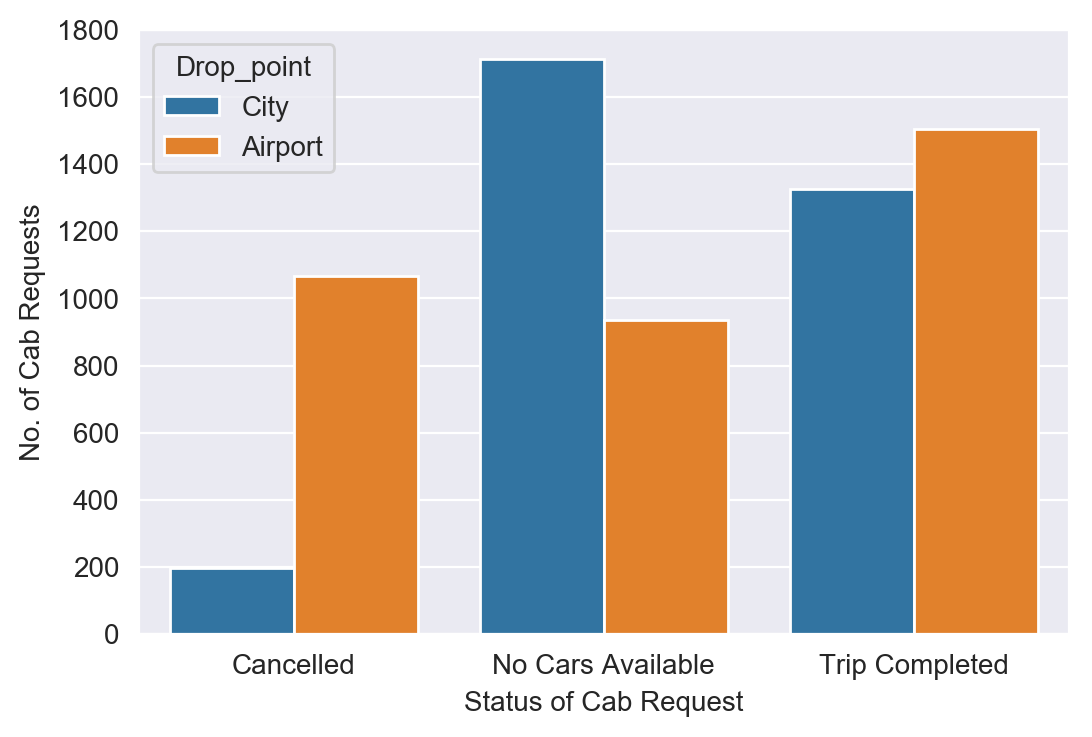

In [29]:
# visualizing the no. of cab requests which got cancelled, completed or unattended(No Cars Available) with drop location
plt.figure(dpi=100)
sns.countplot(x=df['Status'].sort_values(),hue=df['Drop_point'])
plt.ylabel('No. of Cab Requests')
plt.xlabel('Status of Cab Request')
plt.show()

1. Cancellation is more when drop point is Airport
2. Cars are not available when drop point is city , i.e cars are not available in airport

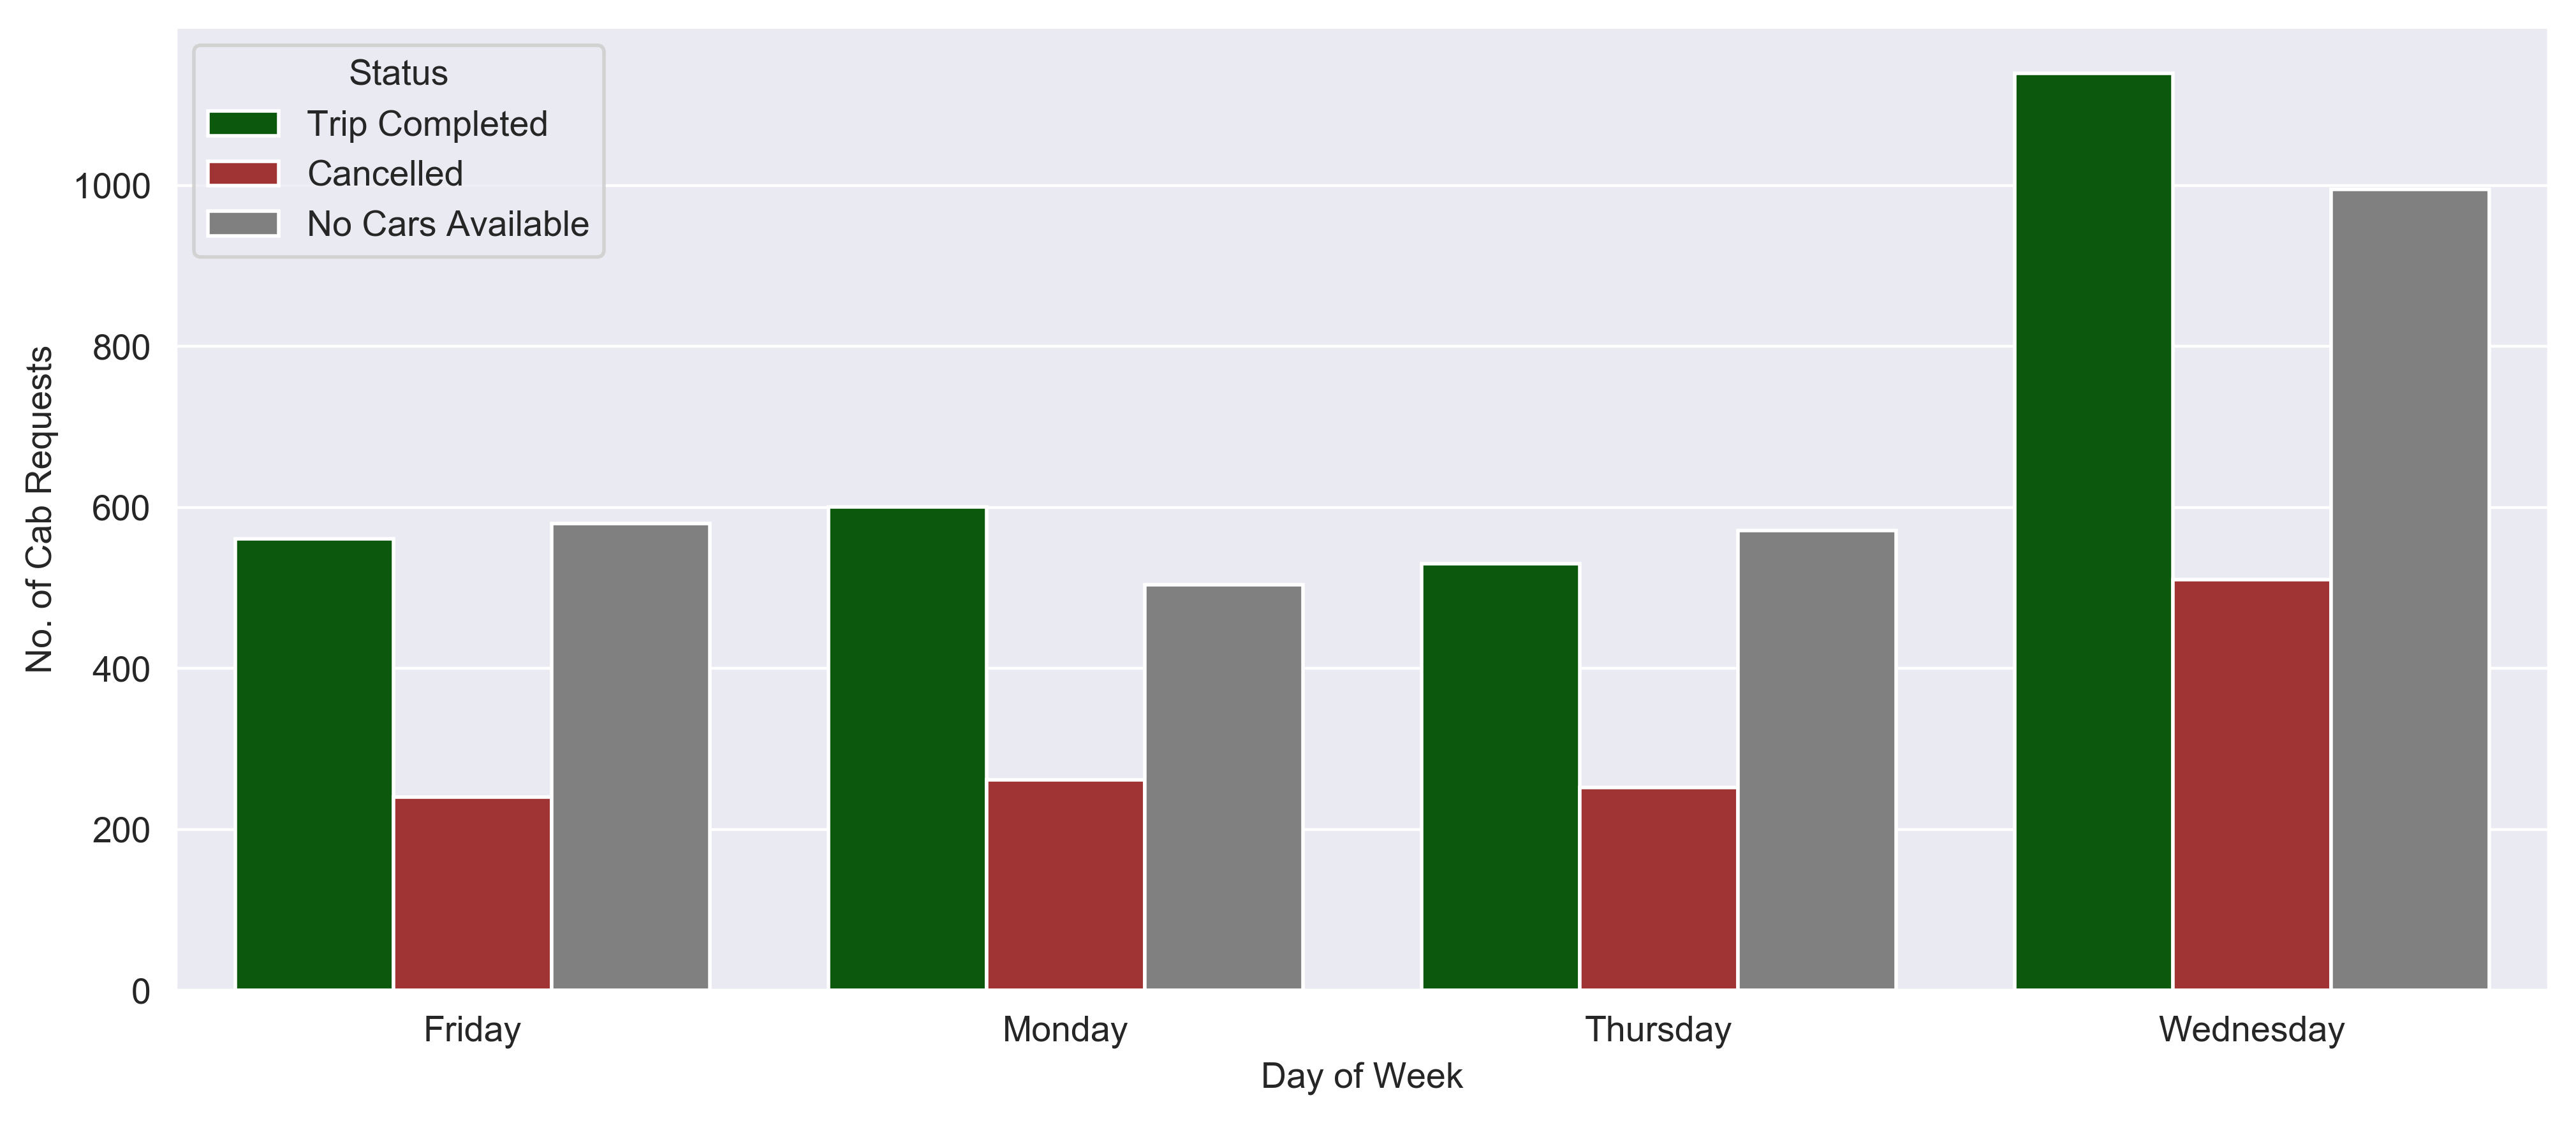

In [30]:
#visualizing the demand and status of cab request over days of week
plt.figure(figsize=(12,5), dpi=200)
pal = {'Trip Completed':"darkgreen", 'Cancelled':"firebrick",'No Cars Available':'gray'}
sns.countplot(x=df['Day'].sort_values(),hue=df['Status'], palette=pal)
plt.ylabel('No. of Cab Requests')
plt.xlabel('Day of Week')
plt.show()

As we have seen earlier that demand for cab is high for wednesday, the cab request cancellation is also higher.
Also adequate no of cabs are not availabe to travel.

## Let create a master chart which will answer all our questions

In [31]:
#pivoting the dataframe and creating new dataframe d1 which contains information about frequency of cab requests during time slots
d1= df.pivot_table(values='Pickup_point' ,index='Time_slot', columns='Drop_point', aggfunc='count')

In [32]:
#reordering the index of dataframe
order = ['Early Morning','Morning','Noon','Afternoon','Evening','Night','Late Night']
d1 = d1.loc[order,:]
d1

Drop_point,Airport,City
Time_slot,,
Early Morning,1116,336
Morning,967,301
Noon,192,152
Afternoon,181,126
Evening,420,1140
Night,437,1002
Late Night,194,181


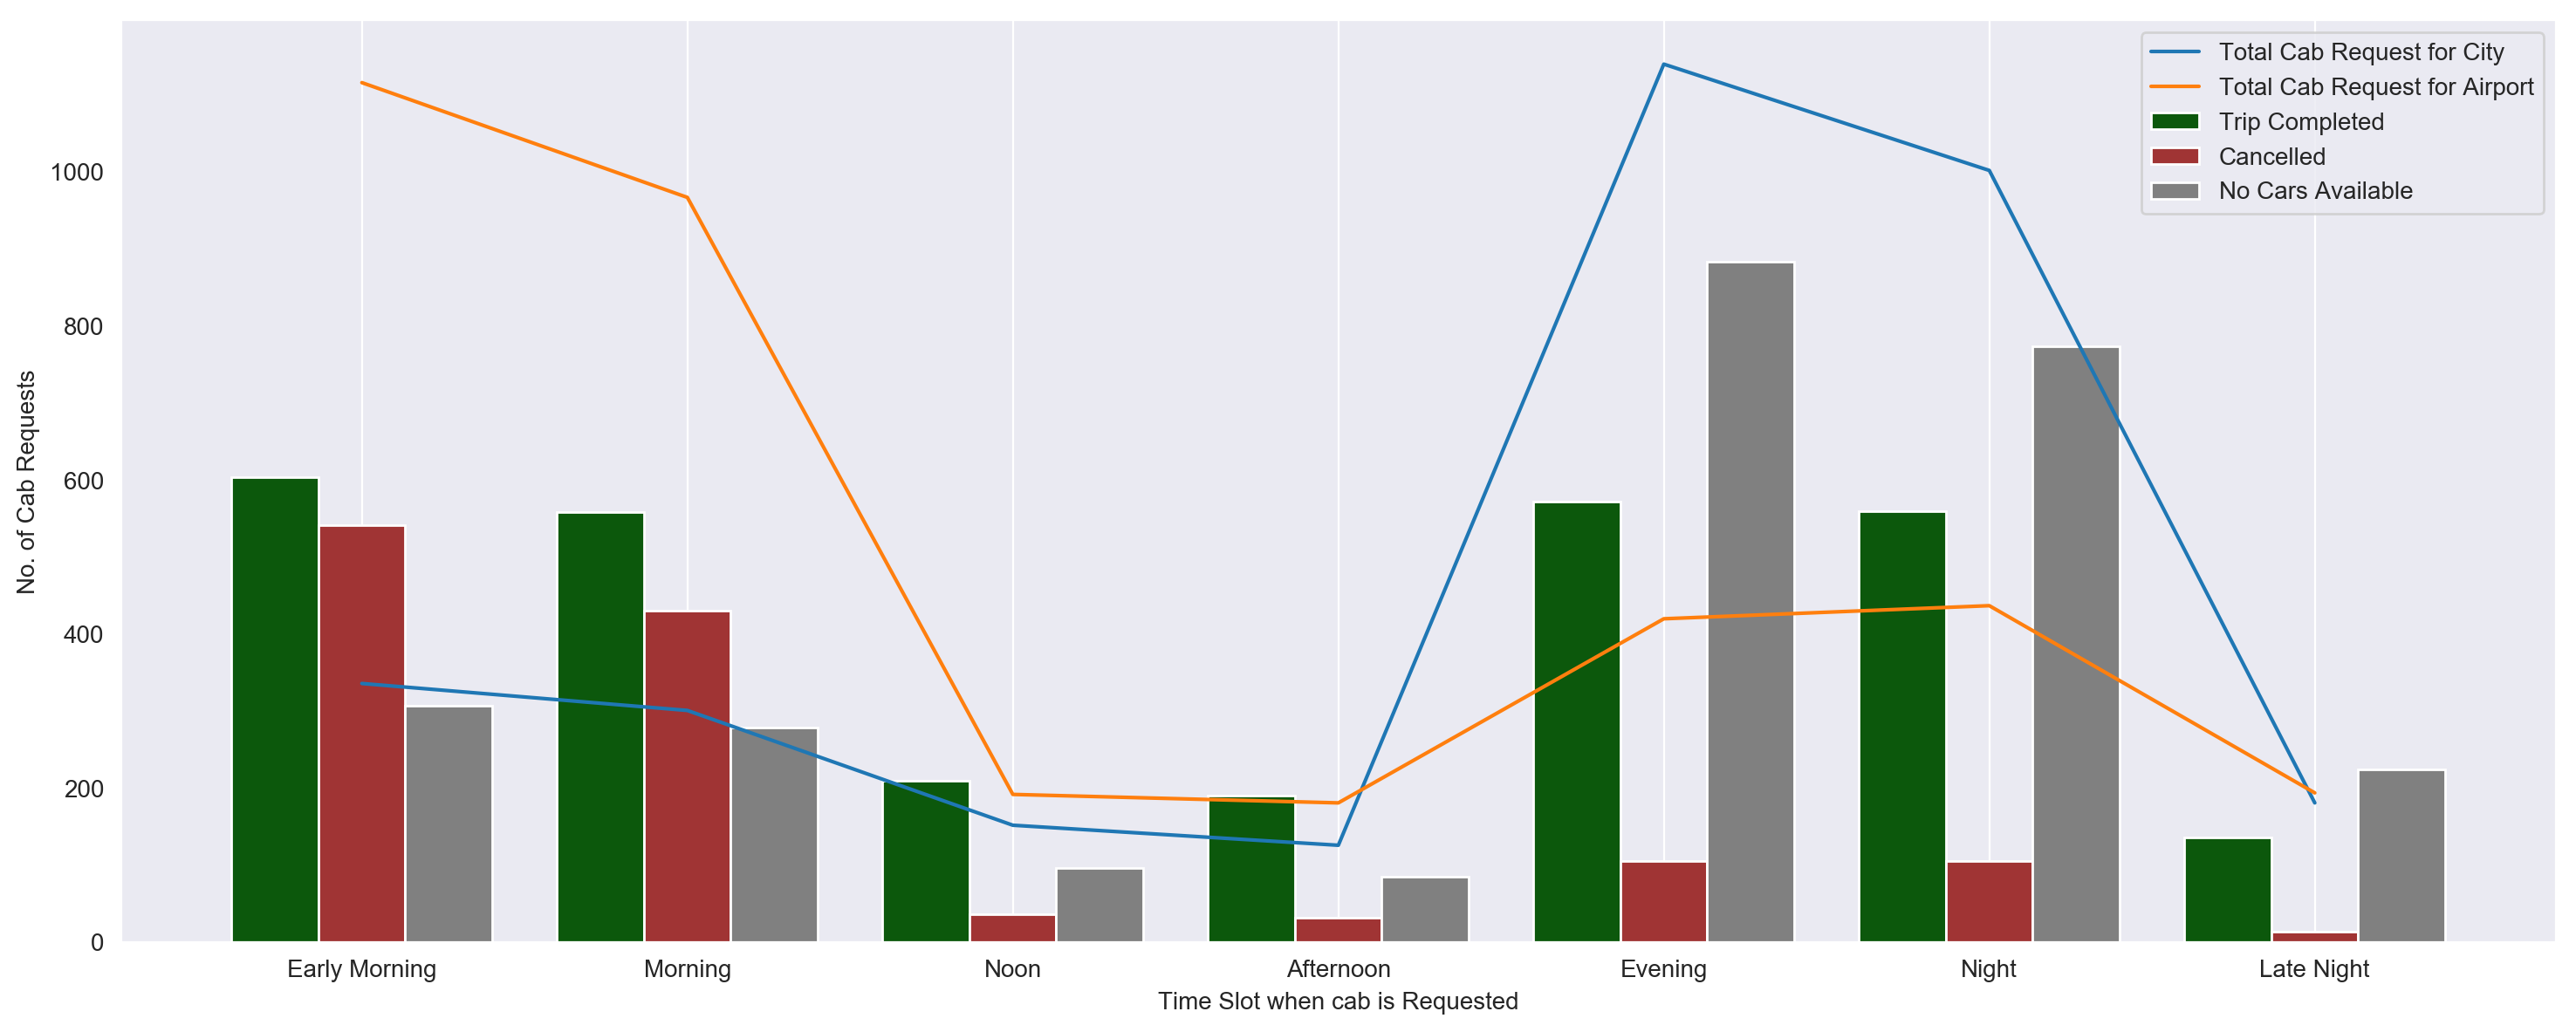

In [33]:
pal = {'Trip Completed':"darkgreen", 'Cancelled':"firebrick",'No Cars Available':'gray'}
order = ['Early Morning','Morning','Noon','Afternoon','Evening','Night','Late Night']
plt.figure(figsize=(18,7), dpi=100)
sns.countplot(x=df['Time_slot'].sort_values(),hue=df['Status'], order = order, palette=pal)
sns.lineplot(x=d1.index,y=d1.City,sort=False, label='Total Cab Request for City')
sns.lineplot(x=d1.index,y=d1.Airport, sort=False, label='Total Cab Request for Airport', markers=True)
plt.ylabel('No. of Cab Requests')
plt.xlabel('Time Slot when cab is Requested')
plt.grid()
plt.show()

## Points from the Above Chart
1. During Early Morning and Morning time, cab request for travelling to Airport (City to Airport) is very high.
2. As you can see cab request during the Noon and After-noon time for travelling is very low from Airport to City, so drivers cancelles the cab because they will have to wait for a longer time during this time to get a ride back to city.
3. Since, large no of trips to airport are cancelled during morning time and less demand of cabs during noon and afternoon the availability of cabs on Airport is very low. Due to which when a person tries to book a cab from Airport to City during Evening and Night faces problem of shortage of cabs.

## Let analyse if there is a group of drivers who are frequently cancelling the cabs

In [34]:
# creating the new dataframe to analyse cancelled and completed trips by drivers
d2 = df[df['Driver_id'] > 0]

In [35]:
# pivoting the dataframe to get the count
d2 = d2.pivot_table(values='Pickup_point' ,index='Driver_id', columns='Status', aggfunc='count')

In [36]:
# selecting those driver who cancels more trips than completing the trip
d3 = d2[d2['Cancelled'] > d2['Trip Completed']]

In [37]:
#changing the datatype of the index to string to enhance readibilit of chart
d3.index = d3.index.astype(str)

In [38]:
#percentage of drivers who cancel trips frequently
round(d3.shape[0]/d2.shape[0]*100,2)

4.33

### There are 4.33 % of drivers which cancel trips frequently 

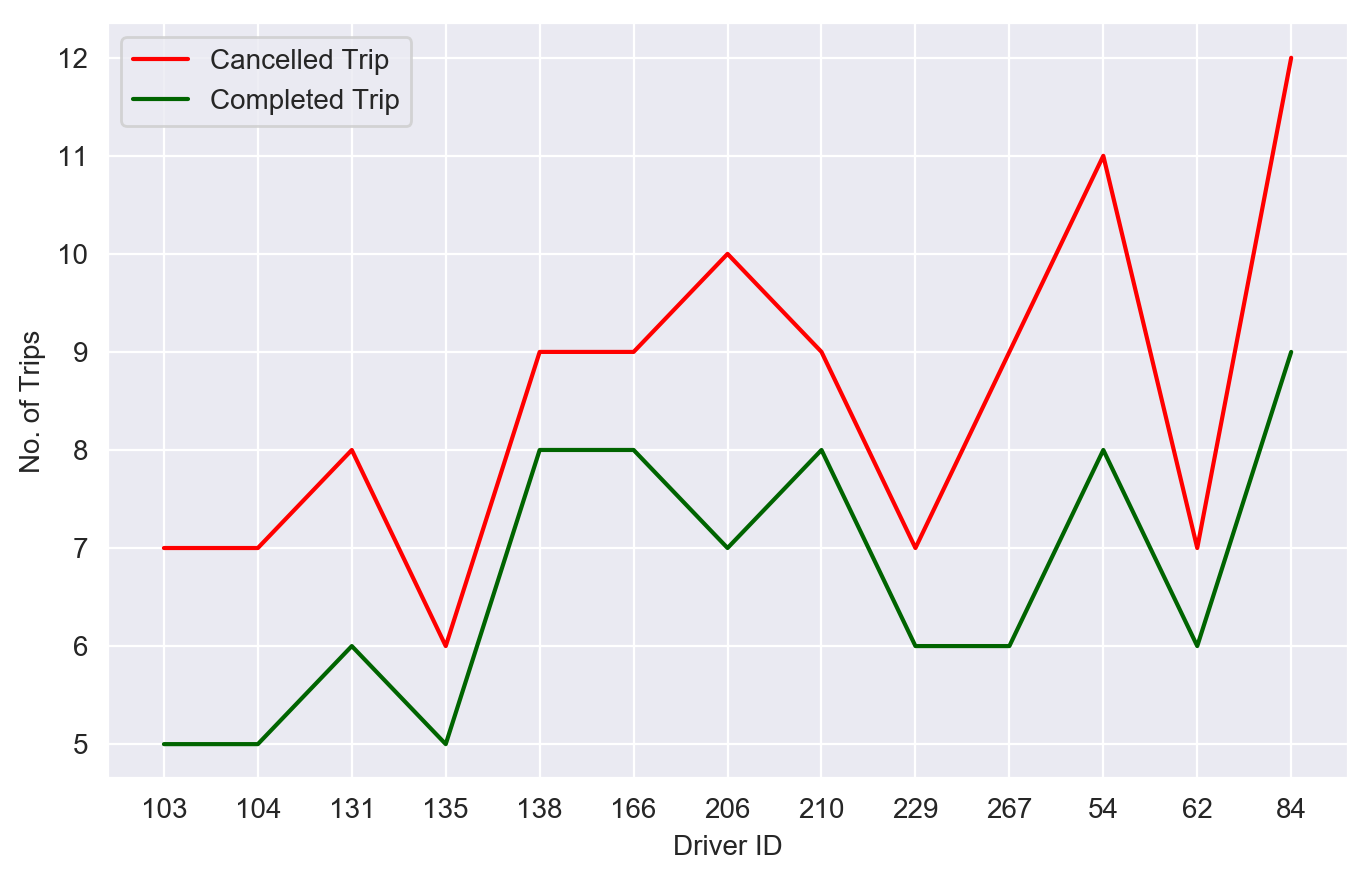

In [39]:
#visualizing the bad drivers
plt.figure(figsize=(8,5), dpi=100)
sns.lineplot(x=d3.index,y=d3.Cancelled, label='Cancelled Trip', color='red')
sns.lineplot(x=d3.index,y=d3['Trip Completed'], label='Completed Trip', color='darkgreen')
plt.ylabel('No. of Trips')
plt.xlabel('Driver ID')
plt.show()

# Recommendations to resolve the supply-demand gap:
1. Penalsing the drivers whose count of trip cancelled is greater than trips completed.
2. Introducing surge pricing during early and morning time when people travel to Airport and increase share of the driver profit to encourage them to complete the trips.This will profit both Uber and Drivers.
3. As we have seen , Demand for Cabs on wednesday is very high, drivers must be given special incentives to complete more trips.
4. Notify the idle drivers to go to Airport during Evening and Night Time and set daily target to complete minimum of 5 trips from Airport to City for each driver.
